# Practical Lab 4 


### Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.


In [119]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

#### Get the Data - Diabetes

In [120]:
# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Extract feature data (data) and target variable
X = diabetes.data
y = diabetes.target

# Convert the data and target to a DataFrame
df = pd.concat([X, y], axis=1)
df.columns = list(diabetes.feature_names) + ['target']


#### Frame the problem Statement
Develop a predictive models using the Diabetes dataset to estimate the risk of diabetes progression based on patients' body mass index (BMI). The objective is to create a screening tool for physicians, aiding in the early identification of patients at risk.

#### Describe the data - statistics, histograms, and a correlation matrix

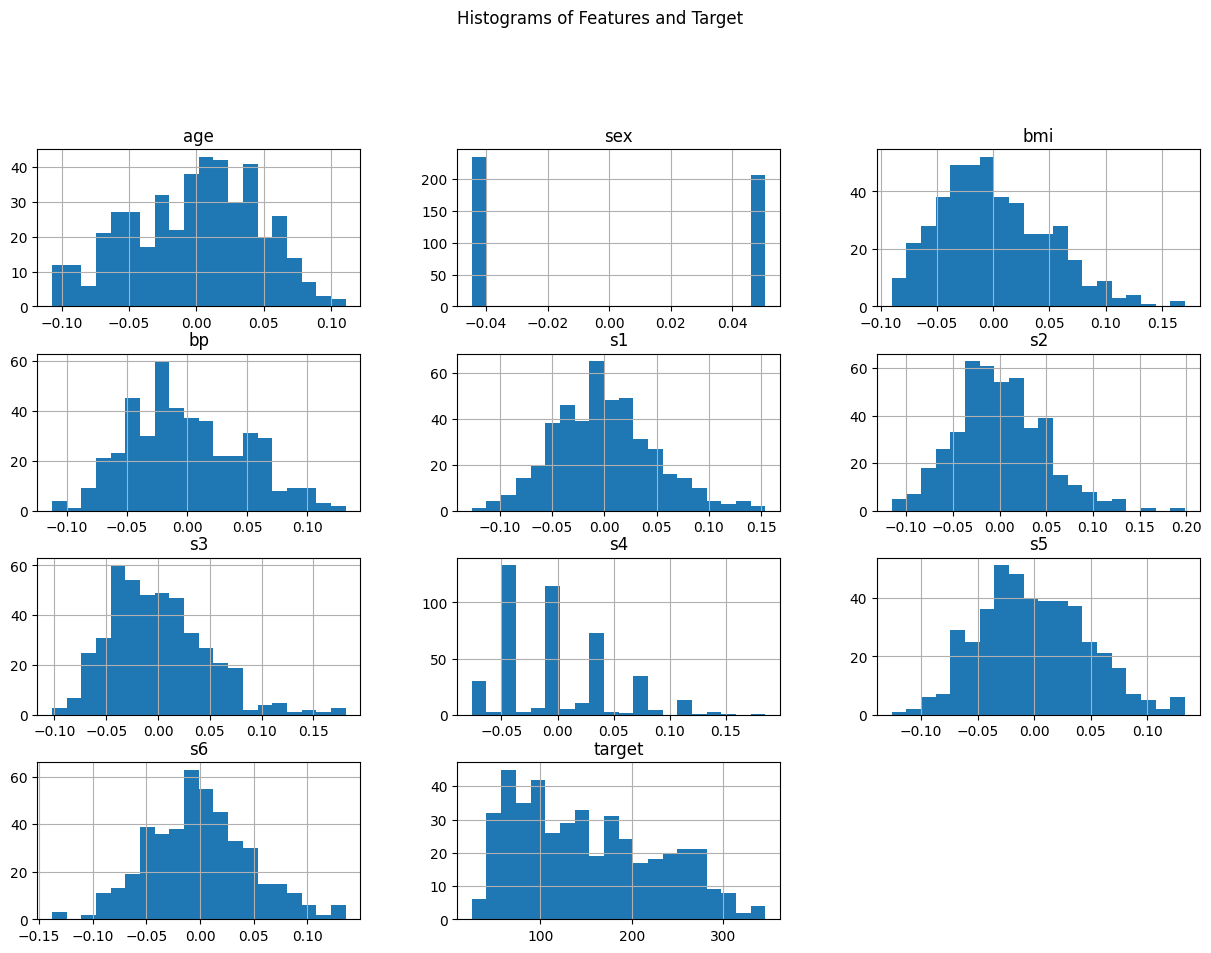

Basic Statistics:
                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

In [121]:
# Display basic statistics
statistics = df.describe()


# Create histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features and Target", y=1.02)
plt.show()

# Create a correlation matrix
correlation_matrix = df.corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix")
# plt.show()

# Display insights
print("Basic Statistics:")
print(statistics)
print("\nCorrelation Matrix:")
print(correlation_matrix)

#### Cleaning the data  

* The data is mean centered and scaled by the standard deviation, hence there is no further need in performing the data cleaning step. 

#### Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [122]:
# Assuming 'bmi' is your feature and 'target' is the target variable
X = df[['bmi']].values
y = df['target'].values

# Split the data into training and temp sets (70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temp set into validation and test sets (50% validation, 50% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) 

In [123]:
def create_polynomial_models(X,y,degrees):
    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

In [124]:
degrees = list(range(0, 6))
models = create_polynomial_models(X_train,y_train,degrees)

# Print Models

for degree, model in models.items():
    print(f'Degree: {degrees}')
    print(f'Model: {models}\n')

Degree: [0, 1, 2, 3, 4, 5]
Model: {0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())]), 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())]), 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())]), 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())]), 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())]), 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])}

Degree: [0, 1, 2, 3, 4, 5]
Model: {0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())]), 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())]), 2: Pipeline(steps

#### Comparing the six models using the training and validation data - Report R-squared, MAPE and MAE. 

In [125]:
# MAPE function
def mape(y_act, y_pred):
    return np.mean(np.abs((y_act - y_pred) / y_act)) * 100


for degree, model in models.items():
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_valid)

    
    print(f'Degree: {degree}\n')

    # Train Data
    print(f" Train R2: {r2_score(y_train, y_train_pred)}")
    print(f" Train MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f" Train MAPE: {mape(y_train, y_train_pred)}\n")

    # Validation Data
    print(f" Validation R2: {r2_score(y_train, y_train_pred)}")
    print(f" Validation MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f" Validation MAPE: {mape(y_train, y_train_pred)}\n")

    

Degree: 0

 Train R2: 0.0
 Train MAE: 66.71392214157791
 Train MAPE: 63.7646882139282

 Validation R2: 0.0
 Validation MAE: 66.71392214157791
 Validation MAPE: 63.7646882139282

Degree: 1

 Train R2: 0.3657651200418852
 Train MAE: 51.95119946335585
 Train MAPE: 48.26278334139995

 Validation R2: 0.3657651200418852
 Validation MAE: 51.95119946335585
 Validation MAPE: 48.26278334139995

Degree: 2

 Train R2: 0.3668374933864168
 Train MAE: 51.8830891249553
 Train MAPE: 48.2172323528028

 Validation R2: 0.3668374933864168
 Validation MAE: 51.8830891249553
 Validation MAPE: 48.2172323528028

Degree: 3

 Train R2: 0.3668398217278851
 Train MAE: 51.87833699666006
 Train MAPE: 48.20859678304109

 Validation R2: 0.3668398217278851
 Validation MAE: 51.87833699666006
 Validation MAPE: 48.20859678304109

Degree: 4

 Train R2: 0.36866451487888596
 Train MAE: 51.772629413150554
 Train MAPE: 47.97620174198621

 Validation R2: 0.36866451487888596
 Validation MAE: 51.772629413150554
 Validation MAPE: 4

#### Conclusion

In [126]:
# Testing 

y_test_pred = models[1].predict(X_test)

print(f" Train R2: {r2_score(y_test, y_test_pred)}")
print(f" Train MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f" Train MAPE: {mape(y_test, y_test_pred)}\n")


 Train R2: 0.260573198482117
 Train MAE: 52.8807854476493
 Train MAPE: 45.54965985312144



On comparing all the other 6 models, it found that the model-1 is the best model as R2 value is better than the other models for the validation data. Hence it will help in predicting the unseen data.

#### Graph of the train, validation and test datapoints

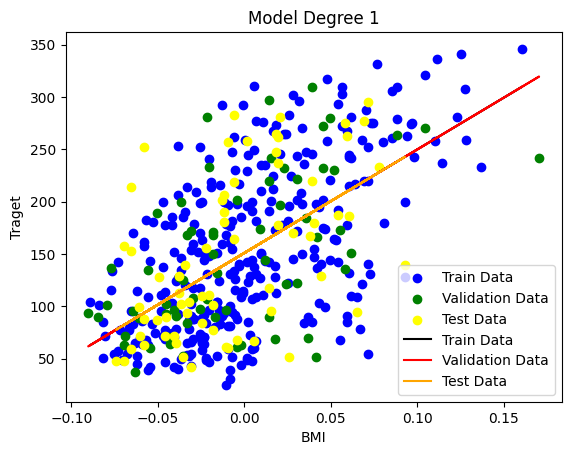

In [139]:
# Scatter plot
plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_valid, y_valid, label='Validation Data', color='green')
plt.scatter(X_test, y_test, label='Test Data', color='yellow')

# Plot data points
plt.plot(X_train,models[1].predict(X_train), color = 'black', label = 'Train Data')
plt.plot(X_valid,models[1].predict(X_valid), color = 'red', label= 'Validation Data')
plt.plot(X_test,models[1].predict(X_test), color = 'orange', label= 'Test Data')

# Add title and label
plt.title('Model Degree 1')
plt.xlabel('BMI')
plt.ylabel('Traget')
plt.legend()
plt.show()

#### Equation of the best model

In [136]:
def print_pipeline_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_}')
    print(f'Intercept: {model[-1].intercept_}')
    # generate equation string:
    equation = "y = "
    for ind, coef in enumerate(model[-1].coef_):
        equation += f'{coef:.2}*x^{ind} + '
    equation += f" {model[-1].intercept_:.2f}"
    print(f'Equation: {equation}')
    print('***')

print_pipeline_model_stats(models[1])

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [  0.         988.41931249]
Intercept: 151.04202449316014
Equation: y = 0.0*x^0 + 9.9e+02*x^1 +  151.04
***


#### Manually calculate diabetes progression for a BMI value of 0.07

In [137]:
bmi_m = 0.07

y_m = 988.41 * bmi_m ** 1 +  151.04
print(y_m)

y_model = models[1].predict([[bmi_m]])
print(y_model)

220.2287
[220.23137637]


#### Trainable parameters

In [138]:
trainable_params = {}  

for degree in range(6):
    poly = PolynomialFeatures (degree=degree)
    X_poly = poly.fit_transform(X_train)
    params_count = X_poly.shape [1]
    trainable_params [degree] = params_count

    print(f'Degree {degree}: {poly.get_feature_names_out ()}')

degrees = list(trainable_params. keys ())
params = list(trainable_params. values())
print( 'Degrees:', degrees)
print( 'Trainable Parameters:', params)

Degree 0: ['1']
Degree 1: ['1' 'x0']
Degree 2: ['1' 'x0' 'x0^2']
Degree 3: ['1' 'x0' 'x0^2' 'x0^3']
Degree 4: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
Degree 5: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']
Degrees: [0, 1, 2, 3, 4, 5]
Trainable Parameters: [1, 2, 3, 4, 5, 6]
